In [1]:
import numpy as np
from MarkerGraph import *
import matplotlib.pyplot as plt
import os

In [2]:
with open('marker_list/SI46.txt') as f:
    si_markers = f.read().splitlines()

In [3]:
p0 = ['Hoechst', 'DRAQ5', 
'CD49f', 'CK7', 'CD19', 'CD123', 'CD66',
'MUC1', 'CD4', 'CD138', 'CD44',
'ITLN1',
'CDX2', 'CD45', 'CD45RO', 'CD117',
'MUC2', 'aSMA', 'CD31']


p1 = ['Hoechst', 'DRAQ5',
'CD57', 'CD90', 
'MUC1', 'CD4', 'CD138', 'CD44',
'CD15', 'CD11c', 'Ki67','CD69',
'CDX2', 'CD45', 'CD45RO','CD117',
'ITLN1',
'CD49a', 'SOX9']


p2 = ['Hoechst', 'DRAQ5',
'CD15', 'CD11c', 'Ki67', 'CD69',
'CDX2', 'CD45', 'CD45RO', 'CD117',
'CD49a', 'SOX9',
'CD68', 'CD21',
'CD8', 'CHGA', 'CD161', 'CD7', 'CD56']


p3 = [ 'Hoechst', 'DRAQ5', 'CD127',
'CD49a', 'SOX9',
'CD8', 'CHGA', 'CD161', 'CD7', 'CD56',
'BCL2',
'ITLN1',
'MUC2', 'aSMA', 'CD31',
'Cytokeratin', 'CD36', 'CD3', 'CD38']


p4 = [ 'Hoechst', 'DRAQ5', 'CD127',
'CD206', 'HLADR', 'CD16', 'CD163', 'Vimentin', 'CD34',
'CD68', 'CD21',
'CD8', 'CHGA', 'CD161', 'CD7', 'CD56',
'CD49a', 'SOX9',
'BCL2']


In [4]:
p0_idx = [si_markers.index(i) for i in p0]
p1_idx = [si_markers.index(i) for i in p1]
p2_idx = [si_markers.index(i) for i in p2]
p3_idx = [si_markers.index(i) for i in p3]
p4_idx = [si_markers.index(i) for i in p4]

p0_idx = sorted(p0_idx)
p1_idx = sorted(p1_idx)
p2_idx = sorted(p2_idx)
p3_idx = sorted(p3_idx)
p4_idx = sorted(p4_idx)

p_all = list(set(p0+p1+p2+p3+p4))
assert len(p_all) == 46

In [5]:
print('p0_idx =', p0_idx, len(p0_idx))
print('p1_idx =', p1_idx, len(p1_idx))
print('p2_idx =', p2_idx, len(p2_idx))
print('p3_idx =', p3_idx, len(p3_idx))
print('p4_idx =', p4_idx, len(p4_idx))

p0_idx = [0, 1, 4, 6, 7, 11, 13, 14, 19, 23, 26, 29, 30, 32, 33, 36, 39, 42, 43] 19
p1_idx = [0, 1, 11, 12, 13, 14, 21, 24, 27, 28, 29, 30, 33, 36, 38, 39, 41, 43, 45] 19
p2_idx = [0, 5, 8, 10, 13, 14, 16, 21, 24, 27, 28, 29, 31, 33, 35, 38, 40, 43, 45] 19
p3_idx = [0, 4, 5, 7, 8, 15, 16, 17, 18, 22, 24, 31, 32, 33, 34, 36, 37, 38, 40] 19
p4_idx = [0, 2, 3, 5, 8, 9, 10, 15, 16, 17, 20, 24, 25, 31, 33, 35, 38, 40, 44] 19


In [6]:
init_mtx_basic = np.load("../single/small_intestine_output/mae_mtx_si_single.npy")

# crop out the initial matrix for each subpanel
p0_mtx = init_mtx_basic[p0_idx, :][:, p0_idx]
p1_mtx = init_mtx_basic[p1_idx, :][:, p1_idx]
p2_mtx = init_mtx_basic[p2_idx, :][:, p2_idx]
p3_mtx = init_mtx_basic[p3_idx, :][:, p3_idx]
p4_mtx = init_mtx_basic[p4_idx, :][:, p4_idx]

In [7]:
num_markers = 46
subgraphs_idx = [p0_idx, p1_idx, p2_idx, p3_idx, p4_idx]
subgraphs_mtx = [p0_mtx, p1_mtx, p2_mtx, p3_mtx, p4_mtx]

### initialize

In [8]:
G = MarkerGraph(subgraphs_idx, subgraphs_mtx, num_markers)
G.mtx

node_costs = []
node_costs.append(np.sum(G.node_weights))

### update round 1

In [9]:
first_marker = G.select_first_input()

input: [38]
output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  1 input:  [38] output:  [0, 1, 11, 12, 13, 14, 21, 24, 27, 28, 29, 30, 33, 36, 39, 41, 43, 45]
training subgraph:  2 input:  [38] output:  [0, 5, 8, 10, 13, 14, 16, 21, 24, 27, 28, 29, 31, 33, 35, 40, 43, 45]
training subgraph:  3 input:  [38] output:  [0, 4, 5, 7, 8, 15, 16, 17, 18, 22, 24, 31, 32, 33, 34, 36, 37, 40]
training subgraph:  4 input:  [38] output:  [0, 2, 3, 5, 8, 9, 10, 15, 16, 17, 20, 24, 25, 31, 33, 35, 40, 44]


In [10]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r1'  --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 --target_index 0 1 11 12 13 14 21 24 27 28 29 30 33 36 39 41 43 45  --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r1'  --path_output_dir 'small_intestine_output/r1_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 --target_index 0 1 11 12 13 14 21 24 27 28 29 30 33 36 39 41 43 45 --in_dim 1 --out_dim 18

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r1'  --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 --target_index 0 5 8 10 13 14 16 21 24 27 28 29 31 33 35 40 43 45 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r1'  --path_output_dir 'small_intestine_output/r1_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 38 --target_index 0 5 8 10 13 14 16 21 24 27 28 29 31 33 35 40 43 4  --in_dim 1 --out_dim 18

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r1'  --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 --target_index 0 4 5 7 8 15 16 17 18 22 24 31 32 33 34 36 37 40 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r1'  --path_output_dir 'small_intestine_output/r1_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 38 --target_index 0 4 5 7 8 15 16 17 18 22 24 31 32 33 34 36 37 40  --in_dim 1 --out_dim 18

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r1'  --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 --target_index 0 2 3 5 8 9 10 15 16 17 20 24 25 31 33 35 40 44  --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r1' --path_output_dir 'small_intestine_output/r1_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 38 --target_index  0 2 3 5 8 9 10 15 16 17 20 24 25 31 33 35 40 44  --in_dim 1 --out_dim 18

In [11]:
subgraph1_prediction = np.load('small_intestine_output/r1_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r1_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r1_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r1_sp4_val_mae.npy', allow_pickle=True)

In [12]:
# update the subgraph matrix
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)

In [13]:
G.update()   
node_costs.append(np.sum(G.node_weights))

### update round 2

In [14]:
next_input = G.select_next_input()

input: [38, 29]
output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [29] output:  [0, 1, 4, 6, 7, 11, 13, 14, 19, 23, 26, 30, 32, 33, 36, 39, 42, 43]
training subgraph:  1 input:  [38, 29] output:  [0, 1, 11, 12, 13, 14, 21, 24, 27, 28, 30, 33, 36, 39, 41, 43, 45]
--out_drop_index:  10
training subgraph:  2 input:  [38, 29] output:  [0, 5, 8, 10, 13, 14, 16, 21, 24, 27, 28, 31, 33, 35, 40, 43, 45]
--out_drop_index:  11


In [15]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r2'  --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 29 --target_index 0 1 4 6 7 11 13 14 19 23 26 30 32 33 36 39 42 43 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r2'  --path_output_dir 'small_intestine_output/r2_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 --target_index  0 1 4 6 7 11 13 14 19 23 26 30 32 33 36 39 42 43  --in_dim 1 --out_dim 18

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r2' --path_pretrain_dir 'test_models_SI_sp1_r1' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 10 --input_index 38 29 --target_index 0 1 11 12 13 14 21 24 27 28 30 33 36 39 41 43 45  --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r2'  --path_output_dir 'small_intestine_output/r2_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 --target_index 0 1 11 12 13 14 21 24 27 28 30 33 36 39 41 43 45 --in_dim 2 --out_dim 17

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r2'  --path_pretrain_dir 'test_models_SI_sp2_r1'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 11 --input_index 38 29 --target_index 0 5 8 10 13 14 16 21 24 27 28 31 33 35 40 43 45 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r2'  --path_output_dir 'small_intestine_output/r2_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 --target_index 0 5 8 10 13 14 16 21 24 27 28 31 33 35 40 43 4  --in_dim 2 --out_dim 17

In [16]:
subgraph0_prediction = np.load('small_intestine_output/r2_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r2_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r2_sp2_val_mae.npy', allow_pickle=True)

In [17]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)

In [18]:
G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 3

In [19]:
next_input = G.select_next_input()

input: [38, 29, 24]
output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  1 input:  [38, 29, 24] output:  [0, 1, 11, 12, 13, 14, 21, 27, 28, 30, 33, 36, 39, 41, 43, 45]
--out_drop_index:  7
training subgraph:  2 input:  [38, 29, 24] output:  [0, 5, 8, 10, 13, 14, 16, 21, 27, 28, 31, 33, 35, 40, 43, 45]
--out_drop_index:  8
training subgraph:  3 input:  [38, 24] output:  [0, 4, 5, 7, 8, 15, 16, 17, 18, 22, 31, 32, 33, 34, 36, 37, 40]
--out_drop_index:  10
training subgraph:  4 input:  [38, 24] output:  [0, 2, 3, 5, 8, 9, 10, 15, 16, 17, 20, 25, 31, 33, 35, 40, 44]
--out_drop_index:  11


In [20]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r3' --path_pretrain_dir 'test_models_SI_sp1_r2' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 7 --input_index 38 29 24 --target_index 0 1 11 12 13 14 21 27 28 30 33 36 39 41 43 45  --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r3'  --path_output_dir 'small_intestine_output/r3_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 --target_index 0 1 11 12 13 14 21 27 28 30 33 36 39 41 43 45 --in_dim 3 --out_dim 16

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r3'  --path_pretrain_dir 'test_models_SI_sp2_r2'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 38 29 24 --target_index 0 5 8 10 13 14 16 21 27 28 31 33 35 40 43 45 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r3'  --path_output_dir 'small_intestine_output/r3_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 --target_index 0 5 8 10 13 14 16 21 27 28 31 33 35 40 43 4  --in_dim 3 --out_dim 16

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r3'  --path_pretrain_dir 'test_models_SI_sp3_r1' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 10 --input_index 10 24 --target_index 0 4 5 7 8 15 16 17 18 22 31 32 33 34 36 37 40 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r3'  --path_output_dir 'small_intestine_output/r3_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 --target_index 0 4 5 7 8 15 16 17 18 22 31 32 33 34 36 37 40  --in_dim 2 --out_dim 17

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r3'  --path_pretrain_dir 'test_models_SI_sp4_r1' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 11 --input_index 38 24  --target_index 0 2 3 5 8 9 10 15 16 17 20 25 31 33 35 40 44  --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r3' --path_output_dir 'small_intestine_output/r3_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 --target_index  0 2 3 5 8 9 10 15 16 17 20 25 31 33 35 40 44  --in_dim 2 --out_dim 17

In [21]:
subgraph1_prediction = np.load('small_intestine_output/r3_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r3_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r3_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r3_sp4_val_mae.npy', allow_pickle=True)

In [22]:
# update the subgraph matrix
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)

G.update()   
node_costs.append(np.sum(G.node_weights))

### Round4

In [23]:
next_input = G.select_next_input()

input: [38, 29, 24, 39]
output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39] output:  [0, 1, 4, 6, 7, 11, 13, 14, 19, 23, 26, 30, 32, 33, 36, 42, 43]
--out_drop_index:  15
training subgraph:  1 input:  [38, 29, 24, 39] output:  [0, 1, 11, 12, 13, 14, 21, 27, 28, 30, 33, 36, 41, 43, 45]
--out_drop_index:  12


In [24]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r4' --path_pretrain_dir 'test_models_SI_sp0_r2' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 15 --input_index 29 39 --target_index 0 1 4 6 7 11 13 14 19 23 26 30 32 33 36 42 43 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r4'  --path_output_dir 'small_intestine_output/r4_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 --target_index  0 1 4 6 7 11 13 14 19 23 26 30 32 33 36 42 43  --in_dim 2 --out_dim 17

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r4' --path_pretrain_dir 'test_models_SI_sp1_r3' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 12 --input_index 38 29 24 39 --target_index 0 1 11 12 13 14 21 27 28 30 33 36 41 43 45  --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r4'  --path_output_dir 'small_intestine_output/r4_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 --target_index 0 1 11 12 13 14 21 27 28 30 33 36 41 43 45 --in_dim 4 --out_dim 15

In [25]:
subgraph0_prediction = np.load('small_intestine_output/r4_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r4_sp1_val_mae.npy', allow_pickle=True)

In [26]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)


G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 5

In [27]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7] output:  [0, 1, 4, 6, 11, 13, 14, 19, 23, 26, 30, 32, 33, 36, 42, 43]
--out_drop_index:  4
training subgraph:  3 input:  [38, 24, 7] output:  [0, 4, 5, 8, 15, 16, 17, 18, 22, 31, 32, 33, 34, 36, 37, 40]
--out_drop_index:  3


In [28]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r5' --path_pretrain_dir 'test_models_SI_sp0_r4' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 4 --input_index 29 39 7 --target_index 0 1 4 6 11 13 14 19 23 26 30 32 33 36 42 43 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r5'  --path_output_dir 'small_intestine_output/r5_sp0_val_mae' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 --target_index  0 1 4 6 11 13 14 19 23 26 30 32 33 36 42 43  --in_dim 3 --out_dim 16

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r5'  --path_pretrain_dir 'test_models_SI_sp3_r3' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 3 --input_index 10 24 7 --target_index 0 4 5 8 15 16 17 18 22 31 32 33 34 36 37 40 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r5'  --path_output_dir 'small_intestine_output/r5_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 --target_index 0 4 5 8 15 16 17 18 22 31 32 33 34 36 37 40  --in_dim 3 --out_dim 16

In [29]:
subgraph0_prediction = np.load('small_intestine_output/r5_sp0_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r5_sp3_val_mae.npy', allow_pickle=True)

In [30]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(3, subgraph3_prediction)

G.update()   
node_costs.append(np.sum(G.node_weights))

### Round6

In [31]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  2 input:  [38, 29, 24, 35] output:  [0, 5, 8, 10, 13, 14, 16, 21, 27, 28, 31, 33, 40, 43, 45]
--out_drop_index:  12
training subgraph:  4 input:  [38, 24, 35] output:  [0, 2, 3, 5, 8, 9, 10, 15, 16, 17, 20, 25, 31, 33, 40, 44]
--out_drop_index:  14


In [32]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r6'  --path_pretrain_dir 'test_models_SI_sp2_r3'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 12 --input_index 38 29 24 35 --target_index 0 5 8 10 13 14 16 21 27 28 31 33 40 43 45 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r6'  --path_output_dir 'small_intestine_output/r6_sp2_val_mae.np' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 --target_index 0 5 8 10 13 14 16 21 27 28 31 33 40 43 45  --in_dim 4 --out_dim 15

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r6'  --path_pretrain_dir 'test_models_SI_sp4_r3' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 14 --input_index 38 24 35 --target_index 0 2 3 5 8 9 10 15 16 17 20 25 31 33 40 44  --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r6' --path_output_dir 'small_intestine_output/r6_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 --target_index  0 2 3 5 8 9 10 15 16 17 20 25 31 33 40 44  --in_dim 3 --out_dim 16

In [33]:
subgraph2_prediction = np.load('small_intestine_output/r6_sp2_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r6_sp4_val_mae.npy', allow_pickle=True)

In [34]:
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(4, subgraph4_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round7

In [35]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33] output:  [0, 1, 4, 6, 11, 13, 14, 19, 23, 26, 30, 32, 36, 42, 43]
--out_drop_index:  12
training subgraph:  1 input:  [38, 29, 24, 39, 33] output:  [0, 1, 11, 12, 13, 14, 21, 27, 28, 30, 36, 41, 43, 45]
--out_drop_index:  10
training subgraph:  2 input:  [38, 29, 24, 35, 33] output:  [0, 5, 8, 10, 13, 14, 16, 21, 27, 28, 31, 40, 43, 45]
--out_drop_index:  11
training subgraph:  3 input:  [38, 24, 7, 33] output:  [0, 4, 5, 8, 15, 16, 17, 18, 22, 31, 32, 34, 36, 37, 40]
--out_drop_index:  11
training subgraph:  4 input:  [38, 24, 35, 33] output:  [0, 2, 3, 5, 8, 9, 10, 15, 16, 17, 20, 25, 31, 40, 44]
--out_drop_index:  13


In [36]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r7' --path_pretrain_dir 'test_models_SI_sp0_r5' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 12 --input_index 29 39 7 33 --target_index 0 1 4 6 11 13 14 19 23 26 30 32 36 42 43 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r7'  --path_output_dir 'small_intestine_output/r7_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 33 --target_index  0 1 4 6 11 13 14 19 23 26 30 32 36 42 43  --in_dim 4 --out_dim 15

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r7' --path_pretrain_dir 'test_models_SI_sp1_r4' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 10 --input_index 38 29 24 39 33 --target_index 0 1 11 12 13 14 21 27 28 30 36 41 43 45  --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r7'  --path_output_dir 'small_intestine_output/r7_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 --target_index 0 1 11 12 13 14 21 27 28 30 36 41 43 45 --in_dim 5 --out_dim 14

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r7'  --path_pretrain_dir 'test_models_SI_sp2_r6'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 11 --input_index 38 29 24 35 33 --target_index 0 5 8 10 13 14 16 21 27 28 31 40 43 45 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r7'  --path_output_dir 'small_intestine_output/r7_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 --target_index 0 5 8 10 13 14 16 21 27 28 31 40 43 45  --in_dim 5 --out_dim 14

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r7'  --path_pretrain_dir 'test_models_SI_sp3_r5' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 11 --input_index 10 24 7 33 --target_index 0 4 5 8 15 16 17 18 22 31 32 34 36 37 40 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r7'  --path_output_dir 'small_intestine_output/r7_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 33 --target_index 0 4 5 8 15 16 17 18 22 31 32 34 36 37 40  --in_dim 4 --out_dim 15

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r7'  --path_pretrain_dir 'test_models_SI_sp4_r6' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 13 --input_index 38 24 35 33 --target_index 0 2 3 5 8 9 10 15 16 17 20 25 31 40 44  --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r7' --path_output_dir 'small_intestine_output/r7_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 33 --target_index  0 2 3 5 8 9 10 15 16 17 20 25 31 40 44  --in_dim 4 --out_dim 15

In [37]:
subgraph0_prediction = np.load('small_intestine_output/r7_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r7_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r7_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r7_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r7_sp4_val_mae.npy', allow_pickle=True)

In [38]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)


G.update()   
node_costs.append(np.sum(G.node_weights))


### Round8

In [39]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13] output:  [0, 1, 4, 6, 11, 14, 19, 23, 26, 30, 32, 36, 42, 43]
--out_drop_index:  5
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13] output:  [0, 1, 11, 12, 14, 21, 27, 28, 30, 36, 41, 43, 45]
--out_drop_index:  4
training subgraph:  2 input:  [38, 29, 24, 35, 33, 13] output:  [0, 5, 8, 10, 14, 16, 21, 27, 28, 31, 40, 43, 45]
--out_drop_index:  4


In [40]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r8' --path_pretrain_dir 'test_models_SI_sp0_r7' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 5 --input_index 29 39 7 33 13 --target_index 0 1 4 6 11 14 19 23 26 30 32 36 42 43 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r8'  --path_output_dir 'small_intestine_output/r8_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 33 13 --target_index  0 1 4 6 11 14 19 23 26 30 32 36 42 43  --in_dim 5 --out_dim 14

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r8' --path_pretrain_dir 'test_models_SI_sp1_r7' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 4 --input_index 38 29 24 39 33 13 --target_index 0 1 11 12 14 21 27 28 30 36 41 43 45  --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r8'  --path_output_dir 'small_intestine_output/r8_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 --target_index 0 1 11 12 14 21 27 28 30 36 41 43 45 --in_dim 6 --out_dim 13

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r8'  --path_pretrain_dir 'test_models_SI_sp2_r7'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 4 --input_index 38 29 24 35 33 13 --target_index 0 5 8 10 14 16 21 27 28 31 40 43 45 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r8'  --path_output_dir 'small_intestine_output/r8_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 13 --target_index 0 5 8 10 14 16 21 27 28 31 40 43 45  --in_dim 6 --out_dim 13

In [41]:
subgraph0_prediction = np.load('small_intestine_output/r8_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r8_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r8_sp2_val_mae.npy', allow_pickle=True)

In [42]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 9

In [43]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43] output:  [0, 1, 4, 6, 11, 14, 19, 23, 26, 30, 32, 36, 42]
--out_drop_index:  13
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13, 43] output:  [0, 1, 11, 12, 14, 21, 27, 28, 30, 36, 41, 45]
--out_drop_index:  11
training subgraph:  2 input:  [38, 29, 24, 35, 33, 13, 43] output:  [0, 5, 8, 10, 14, 16, 21, 27, 28, 31, 40, 45]
--out_drop_index:  11


In [44]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r9' --path_pretrain_dir 'test_models_SI_sp0_r8' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 13 --input_index 29 39 7 33 13 43 --target_index 0 1 4 6 11 14 19 23 26 30 32 36 42 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r9'  --path_output_dir 'small_intestine_output/r9_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 33 13 43 --target_index  0 1 4 6 11 14 19 23 26 30 32 36 42  --in_dim 6 --out_dim 13

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r9' --path_pretrain_dir 'test_models_SI_sp1_r8' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 11 --input_index 38 29 24 39 33 13 43 --target_index 0 1 11 12 14 21 27 28 30 36 41 45  --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r9'  --path_output_dir 'small_intestine_output/r9_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 43 --target_index 0 1 11 12 14 21 27 28 30 36 41 45 --in_dim 7 --out_dim 12

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r9'  --path_pretrain_dir 'test_models_SI_sp2_r8'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 11 --input_index 38 29 24 35 33 13 43 --target_index 0 5 8 10 14 16 21 27 28 31 40 45 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r9'  --path_output_dir 'small_intestine_output/r9_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 13 43 --target_index 0 5 8 10 14 16 21 27 28 31 40 45  --in_dim 7 --out_dim 12

In [45]:
subgraph0_prediction = np.load('small_intestine_output/r9_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r9_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r9_sp2_val_mae.npy', allow_pickle=True)

G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)


G.update()   
node_costs.append(np.sum(G.node_weights))

### Round10

In [46]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14] output:  [0, 1, 4, 6, 11, 19, 23, 26, 30, 32, 36, 42]
--out_drop_index:  5
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13, 43, 14] output:  [0, 1, 11, 12, 21, 27, 28, 30, 36, 41, 45]
--out_drop_index:  4
training subgraph:  2 input:  [38, 29, 24, 35, 33, 13, 43, 14] output:  [0, 5, 8, 10, 16, 21, 27, 28, 31, 40, 45]
--out_drop_index:  4


In [47]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r10' --path_pretrain_dir 'test_models_SI_sp0_r9' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 5 --input_index 29 39 7 33 13 43 14 --target_index 0 1 4 6 11 19 23 26 30 32 36 42 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r10'  --path_output_dir 'small_intestine_output/r10_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 33 13 43 14 --target_index  0 1 4 6 11 19 23 26 30 32 36 42  --in_dim 7 --out_dim 12

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r10' --path_pretrain_dir 'test_models_SI_sp1_r9' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 4 --input_index 38 29 24 39 33 13 43 14 --target_index 0 1 11 12 21 27 28 30 36 41 45  --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r10'  --path_output_dir 'small_intestine_output/r10_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 43 14 --target_index 0 1 11 12 21 27 28 30 36 41 45 --in_dim 8 --out_dim 11

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r10'  --path_pretrain_dir 'test_models_SI_sp2_r9'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 4 --input_index 38 29 24 35 33 13 43 14 --target_index 0 5 8 10 16 21 27 28 31 40 45 --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r10'  --path_output_dir 'small_intestine_output/r10_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 13 43 14 --target_index 0 5 8 10 16 21 27 28 31 40 45  --in_dim 8 --out_dim 11

In [48]:
subgraph0_prediction = np.load('small_intestine_output/r10_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r10_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r10_sp2_val_mae.npy', allow_pickle=True)

G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)

G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 11

In [49]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32] output:  [0, 1, 4, 6, 11, 19, 23, 26, 30, 36, 42]
--out_drop_index:  9
training subgraph:  3 input:  [38, 24, 7, 33, 32] output:  [0, 4, 5, 8, 15, 16, 17, 18, 22, 31, 34, 36, 37, 40]
--out_drop_index:  10


In [50]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r11' --path_pretrain_dir 'test_models_SI_sp0_r10' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 9 --input_index 29 39 7 33 13 43 14 32 --target_index 0 1 4 6 11 19 23 26 30 36 42 --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r11'  --path_output_dir 'small_intestine_output/r11_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 29 39 7 33 13 43 14 32 --target_index  0 1 4 6 11 19 23 26 30 36 42  --in_dim 8 --out_dim 11

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r11'  --path_pretrain_dir 'test_models_SI_sp3_r7' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 10 --input_index 10 24 7 33 32 --target_index 0 4 5 8 15 16 17 18 22 31 34 36 37 40 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r11'  --path_output_dir 'small_intestine_output/r11_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 33 32 --target_index 0 4 5 8 15 16 17 18 22 31 34 36 37 40  --in_dim 5 --out_dim 14

In [51]:
subgraph0_prediction = np.load('small_intestine_output/r11_sp0_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r11_sp3_val_mae.npy', allow_pickle=True)


G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(3, subgraph3_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round12

In [52]:
next_input = G.select_next_input()

tie
candidates:  36 42 input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32, 36] output:  [0, 1, 4, 6, 11, 19, 23, 26, 30, 42]
--out_drop_index:  9
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13, 43, 14, 36] output:  [0, 1, 11, 12, 21, 27, 28, 30, 41, 45]
--out_drop_index:  8
training subgraph:  3 input:  [38, 24, 7, 33, 32, 36] output:  [0, 4, 5, 8, 15, 16, 17, 18, 22, 31, 34, 37, 40]
--out_drop_index:  11


In [53]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r12' --path_pretrain_dir 'test_models_SI_sp0_r11' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 9 --input_index 29 39 7 33 13 43 14 32 36 --target_index 0 1 4 6 11 19 23 26 30 42 --in_dim 9 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r12'  --path_output_dir 'small_intestine_output/r12_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_p1th_SI.csv"  --input_index 29 39 7 33 13 43 14 32 36 --target_index  0 1 4 6 11 19 23 26 30 42  --in_dim 9 --out_dim 10

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r12' --path_pretrain_dir 'test_models_SI_sp1_r10' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 8 --input_index 38 29 24 39 33 13 43 14 36 --target_index 0 1 11 12 21 27 28 30 41 45  --in_dim 9 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r12'  --path_output_dir 'small_intestine_output/r12_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 43 14 36 --target_index 0 1 11 12 21 27 28 30 41 45 --in_dim 9 --out_dim 10

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r12'  --path_pretrain_dir 'test_models_SI_sp3_r11' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 11 --input_index 10 24 7 33 32 36 --target_index 0 4 5 8 15 16 17 18 22 31 34 37 40 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r12'  --path_output_dir 'small_intestine_output/r12_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 33 32 --target_index 0 4 5 8 15 16 17 18 22 31 34 36 37 40  --in_dim 6 --out_dim 13

In [54]:
subgraph0_prediction = np.load('small_intestine_output/r12_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r12_sp1_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r12_sp3_val_mae.npy', allow_pickle=True)


G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(3, subgraph3_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 13

In [55]:
next_input = G.select_next_input()

tie
candidates:  10 44 input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10]
output: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  2 input:  [38, 29, 24, 35, 33, 13, 43, 14, 10] output:  [0, 5, 8, 16, 21, 27, 28, 31, 40, 45]
--out_drop_index:  3
training subgraph:  4 input:  [38, 24, 35, 33, 10] output:  [0, 2, 3, 5, 8, 9, 15, 16, 17, 20, 25, 31, 40, 44]
--out_drop_index:  6


In [56]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r13'  --path_pretrain_dir 'test_models_SI_sp2_r10'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 3 --input_index 38 29 24 35 33 13 43 14 10 --target_index 0 5 8 16 21 27 28 31 40 45 --in_dim 9 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r13'  --path_output_dir 'small_intestine_output/r13_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 13 43 14 10 --target_index 0 5 8 16 21 27 28 31 40 45  --in_dim 9 --out_dim 10

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r13'  --path_pretrain_dir 'test_models_SI_sp4_r7' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 6 --input_index 38 24 35 33 10 --target_index 0 2 3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r13' --path_output_dir 'small_intestine_output/r13_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 33 10 --target_index  0 2 3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 5 --out_dim 14

In [57]:
subgraph2_prediction = np.load('small_intestine_output/r13_sp2_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r13_sp4_val_mae.npy', allow_pickle=True)


G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(4, subgraph4_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 14

In [58]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0]
output: [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32, 36, 0] output:  [1, 4, 6, 11, 19, 23, 26, 30, 42]
--out_drop_index:  0
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13, 43, 14, 36, 0] output:  [1, 11, 12, 21, 27, 28, 30, 41, 45]
--out_drop_index:  0
training subgraph:  2 input:  [38, 29, 24, 35, 33, 13, 43, 14, 10, 0] output:  [5, 8, 16, 21, 27, 28, 31, 40, 45]
--out_drop_index:  0
training subgraph:  3 input:  [38, 24, 7, 33, 32, 36, 0] output:  [4, 5, 8, 15, 16, 17, 18, 22, 31, 34, 37, 40]
--out_drop_index:  0
training subgraph:  4 input:  [38, 24, 35, 33, 10, 0] output:  [2, 3, 5, 8, 9, 15, 16, 17, 20, 25, 31, 40, 44]
--out_drop_index:  0


In [59]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r14' --path_pretrain_dir 'test_models_SI_sp0_r12' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 29 39 7 33 13 43 14 32 36 0 --target_index 1 4 6 11 19 23 26 30 42 --in_dim 10 --out_dim 9
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r14'  --path_output_dir 'small_intestine_output/r14_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_p1th_SI.csv"  --input_index 29 39 7 33 13 43 14 32 36 0 --target_index  1 4 6 11 19 23 26 30 42  --in_dim 10 --out_dim 9

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r14' --path_pretrain_dir 'test_models_SI_sp1_r12' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 38 29 24 39 33 13 43 14 36 0 --target_index 1 11 12 21 27 28 30 41 45  --in_dim 10 --out_dim 9
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r14'  --path_output_dir 'small_intestine_output/r14_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 43 14 36 0 --target_index 1 11 12 21 27 28 30 41 45 --in_dim 10 --out_dim 9

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp2_r14'  --path_pretrain_dir 'test_models_SI_sp2_r13'--path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 38 29 24 35 33 13 43 14 10 0 --target_index 5 8 16 21 27 28 31 40 45 --in_dim 10 --out_dim 9
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp2_r14'  --path_output_dir 'small_intestine_output/r14_sp2_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 35 33 13 43 14 10 0 --target_index 5 8 16 21 27 28 31 40 45  --in_dim 10 --out_dim 9

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r14'  --path_pretrain_dir 'test_models_SI_sp3_r12' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 10 24 7 33 32 36 0 --target_index 4 5 8 15 16 17 18 22 31 34 37 40 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r14'  --path_output_dir 'small_intestine_output/r14_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 33 32 0 --target_index 4 5 8 15 16 17 18 22 31 34 36 37 40  --in_dim 7 --out_dim 12

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r14'  --path_pretrain_dir 'test_models_SI_sp4_r13' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 38 24 35 33 10 0 --target_index 2 3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r14' --path_output_dir 'small_intestine_output/r14_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 33 10 0 --target_index  2 3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 6 --out_dim 13

In [60]:
subgraph0_prediction = np.load('small_intestine_output/r14_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r14_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('small_intestine_output/r14_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r14_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('small_intestine_output/r14_sp4_val_mae.npy', allow_pickle=True)

In [61]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)


G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 15

In [62]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0, 42]
output: [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 44, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32, 36, 0, 42] output:  [1, 4, 6, 11, 19, 23, 26, 30]
--out_drop_index:  8


In [63]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r15' --path_pretrain_dir 'test_models_SI_sp0_r14' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 8 --input_index 29 39 7 33 13 43 14 32 36 0 42 --target_index 1 4 6 11 19 23 26 30  --in_dim 11 --out_dim 8 
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r15'  --path_output_dir 'large_intestine_output/r15_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_p1th_SI.csv"  --input_index 29 39 7 33 13 43 14 32 36 0 42 --target_index  1 4 6 11 19 23 26 30  --in_dim 11 --out_dim 8

In [64]:
subgraph0_prediction = np.load('small_intestine_output/r15_sp0_val_mae.npy', allow_pickle=True)
G.update_subgraph(0, subgraph0_prediction)
G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 16

In [65]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0, 42, 2]
output: [1, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 44, 45]
--------------------------------
training subgraph:  4 input:  [38, 24, 35, 33, 10, 0, 2] output:  [3, 5, 8, 9, 15, 16, 17, 20, 25, 31, 40, 44]
--out_drop_index:  0


In [66]:
# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r16'  --path_pretrain_dir 'test_models_SI_sp4_r14' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 38 24 35 33 10 0 2 --target_index 3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r16' --path_output_dir 'small_intestine_output/r16_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 33 10 0 2 --target_index  3 5 8 9 15 16 17 20 25 31 40 44  --in_dim 7 --out_dim 12

In [67]:
subgraph4_prediction = np.load('small_intestine_output/r16_sp4_val_mae.npy', allow_pickle=True)
G.update_subgraph(4, subgraph4_prediction)
G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 17

In [68]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0, 42, 2, 44]
output: [1, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 45]
--------------------------------
training subgraph:  4 input:  [38, 24, 35, 33, 10, 0, 2, 44] output:  [3, 5, 8, 9, 15, 16, 17, 20, 25, 31, 40]
--out_drop_index:  11


In [69]:
# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp4_r17'  --path_pretrain_dir 'test_models_SI_sp4_r16' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 11 --input_index 38 24 35 33 10 0 2 44 --target_index 3 5 8 9 15 16 17 20 25 31 40  --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp4_r17' --path_output_dir 'small_intestine_output/r17_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_SI.csv" --input_index 38 24 35 33 10 0 2 44 --target_index  3 5 8 9 15 16 17 20 25 31 40  --in_dim 8 --out_dim 11

In [70]:
subgraph4_prediction = np.load('small_intestine_output/r17_sp4_val_mae.npy', allow_pickle=True)
G.update_subgraph(4, subgraph4_prediction)
G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 18

In [71]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0, 42, 2, 44, 11]
output: [1, 3, 4, 5, 6, 8, 9, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32, 36, 0, 42, 11] output:  [1, 4, 6, 19, 23, 26, 30]
--out_drop_index:  3
training subgraph:  1 input:  [38, 29, 24, 39, 33, 13, 43, 14, 36, 0, 11] output:  [1, 12, 21, 27, 28, 30, 41, 45]
--out_drop_index:  1


In [72]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r18' --path_pretrain_dir 'test_models_SI_sp0_r15' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 3 --input_index 29 39 7 33 13 43 14 32 36 0 42 11 --target_index 1 4 6 19 23 26 30  --in_dim 12 --out_dim 7 
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r15'  --path_output_dir 'small_intestine_output/r18_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_p1th_SI.csv"  --input_index 29 39 7 33 13 43 14 32 36 0 42 11  --target_index  1 4 6 19 23 26 30  --in_dim 12 --out_dim 7

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp1_r18' --path_pretrain_dir 'test_models_SI_sp1_r14' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 1 --input_index 38 29 24 39 33 13 43 14 36 0 11 --target_index 1 12 21 27 28 30 41 45  --in_dim 11 --out_dim 8
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp1_r18'  --path_output_dir 'small_intestine_output/r18_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 29 24 39 33 13 43 14 36 0 11 --target_index 1 12 21 27 28 30 41 45 --in_dim 11 --out_dim 8

In [73]:
subgraph0_prediction = np.load('small_intestine_output/r18_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('small_intestine_output/r18_sp1_val_mae.npy', allow_pickle=True)


G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)



G.update()   
node_costs.append(np.sum(G.node_weights))

### Round 19

In [74]:
next_input = G.select_next_input()

input: [38, 29, 24, 39, 7, 35, 33, 13, 43, 14, 32, 36, 10, 0, 42, 2, 44, 11, 4]
output: [1, 3, 5, 6, 8, 9, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 37, 40, 41, 45]
--------------------------------
training subgraph:  0 input:  [29, 39, 7, 33, 13, 43, 14, 32, 36, 0, 42, 11, 4] output:  [1, 6, 19, 23, 26, 30]
--out_drop_index:  1
training subgraph:  3 input:  [38, 24, 7, 33, 32, 36, 0, 4] output:  [5, 8, 15, 16, 17, 18, 22, 31, 34, 37, 40]
--out_drop_index:  0


In [75]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp0_r19' --path_pretrain_dir 'test_models_SI_sp0_r18' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 1 --input_index 29 39 7 33 13 43 14 32 36 0 42 11 4 --target_index 1 6 19 23 26 30  --in_dim 13 --out_dim 6 
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp0_r19'  --path_output_dir 'small_intestine_output/r19_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_p1th_SI.csv"  --input_index 29 39 7 33 13 43 14 32 36 0 42 11 4  --target_index  1 6 19 23 26 30  --in_dim 13 --out_dim 6

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_SI_sp3_r19'  --path_pretrain_dir 'test_models_SI_sp3_r14' --path_dataset_csv "../csv/train_path_SI.csv" --path_dataset_val_csv "../csv/val_path_SI.csv" --out_drop_index 0 --input_index 10 24 7 33 32 36 0 4 --target_index 5 8 15 16 17 18 22 31 34 37 40 --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_SI_sp3_r19'  --path_output_dir 'small_intestine_output/r19_sp3_val_mae.npy' --path_dataset_val_csv "../csv/val_path_SI.csv"  --input_index 38 24 7 33 32 0 4 --target_index 5 8 15 16 17 18 22 31 34 36 37 40  --in_dim 8 --out_dim 11

In [76]:
subgraph0_prediction = np.load('small_intestine_output/r19_sp0_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('small_intestine_output/r19_sp3_val_mae.npy', allow_pickle=True)


G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(3, subgraph3_prediction)


G.update()   
node_costs.append(np.sum(G.node_weights))
np.save("si_node_costs.npy", node_costs)

In [77]:
import numpy as np
# np.save("si_mtx.npy", G.mtx)
si_mtx = np.load("si_mtx.npy")

with open('marker_list/SI46.txt') as f:
    li_markers = f.read().splitlines()

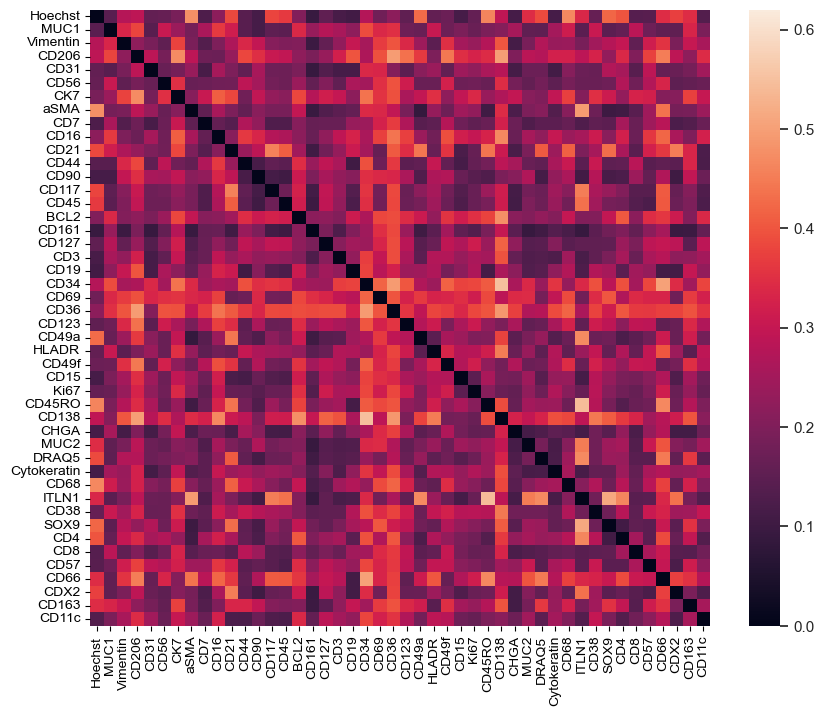

In [78]:
# heatmap of final graph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_theme()
df = pd.DataFrame(si_mtx)
p = sns.heatmap(df, xticklabels=True, yticklabels=True, vmin=0, vmax = 0.62)
p.set_xticklabels(li_markers, rotation=90)
p.set_yticklabels(li_markers, rotation=0)
plt.show()